In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function

In [3]:
class L40(object):
    '''Lorenz 40 model of zonal atmospheric flow'''
    
    def __init__(self, members=1, n=40, dt=0.05, F=8):
        self.n = n
        self.dt = dt
        self.dtx = dt
        self.x = np.random.normal(0., 0.1, size=(members, n))
        self.members = members
        self.F = F
    
    def dxdt(self):
        dxdt = np.zeros((self.members, self.n),'f8')
        for n in range(2,self.n-1):
            dxdt[:,n] = -self.x[:,n-2]*self.x[:,n-1] +  \
                        self.x[:,n-1]*self.x[:,n+1] - self.x[:,n] + self.F
        dxdt[:,0] = -self.x[:,self.n-2]*self.x[:,self.n-1] +  \
                self.x[:,self.n-1]*self.x[:,1] - self.x[:,0] + self.F
        dxdt[:,1] = -self.x[:,self.n-1]*self.x[:,0] + \
                self.x[:,0]*self.x[:,2] - self.x[:,1] + self.F
        dxdt[:,self.n-1] = -self.x[:,self.n-3]*self.x[:,self.n-2] + \
                            self.x[:,self.n-2]*self.x[:,0] - \
                            self.x[:,self.n-1] + self.F
        return dxdt
    
    def rk4step(self):
        h = self.dt; hh = 0.5*h; h6 = h/6.
        x = self.x
        dxdt1 = self.dxdt()
        self.x = x + hh*dxdt1
        dxdt2 = self.dxdt()
        self.x = x + hh*dxdt2
        dxdt = self.dxdt()
        self.x = x + h*dxdt
        dxdt2 = 2.0*(dxdt2 + dxdt)
        dxdt = self.dxdt()
        self.x = x + h6*(dxdt1 + dxdt + dxdt2)


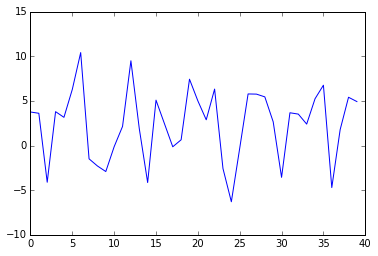

In [6]:
m = L40()
for n in range(1000):
    m.rk4step()

plt.plot(m.x[0])

In [52]:
members = 50
ens = L40(members=members)
ens.x = m.x[0] + 0.01 * np.random.randn(members, m.n)
for _ in range(50):
    ens.rk4step()
    m.rk4step()

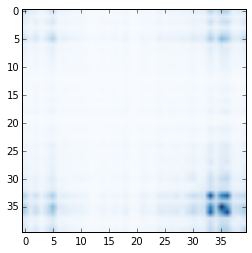

In [53]:
xb_bar = ens.x.mean(axis=0)
xb_prime = ens.x - xb_bar
Pb = np.sum(np.abs(xb_prime[:, np.newaxis, :] * xb_prime[:, :, np.newaxis]), axis=0)/(members-1)
plt.imshow(Pb, cmap='Blues')

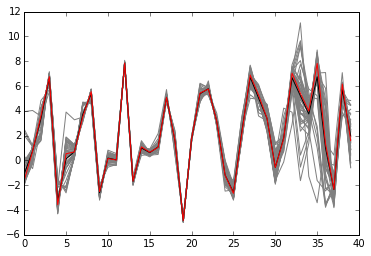

In [54]:
plt.plot(ens.x.T, color='0.5');
plt.plot(xb_bar, color='k')
plt.plot(m.x[0], color='r');

In [46]:
res = []
for n in range(600):
    m.rk4step()
    res.append(m.x[0,:])

In [47]:
res = np.asarray(res)

In [48]:
res.shape

(600, 40)

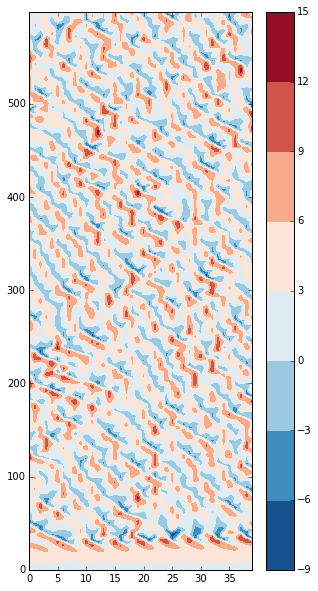

In [49]:
fig = plt.figure(figsize=(5, 10))
plt.contourf(res, cmap='RdBu_r')
plt.colorbar()

In [50]:
np.var(m.x)

10.761630780589126

In [51]:
res.shape

(600, 40)

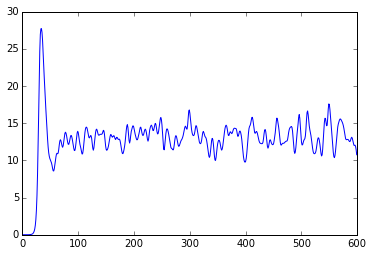

In [54]:
plt.plot(np.var(res, axis=-1))

In [85]:
M = 50
ens = L40(members=M)

In [86]:
ens.x = m.x[0] + 0.01 * np.random.randn(M, 40)

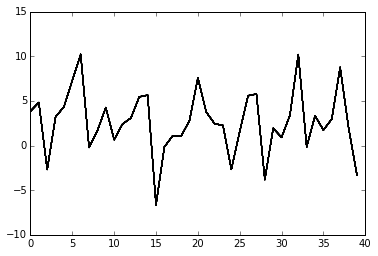

In [87]:
plt.plot(m.x[0], '-r');
plt.plot(ens.x.T, '-k');

In [88]:
mres = []
eres = []
for n in range(500):
    m.rk4step()
    ens.rk4step()
    mres.append(m.x[0])
    eres.append(ens.x[:, :])

In [89]:
mres = np.asarray(mres)
eres = np.asarray(eres)

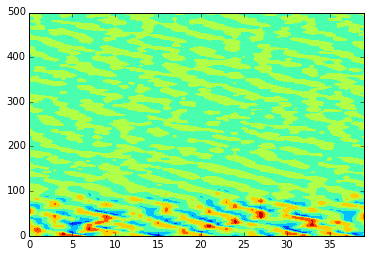

In [95]:
plt.contourf(eres.mean(axis=1).squeeze())

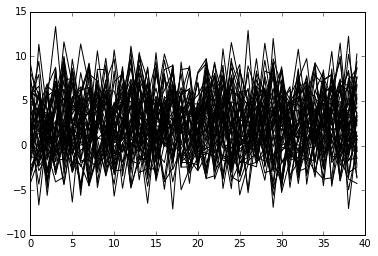

In [97]:
plt.plot(ens.x.T, '-k');